In [1]:
# IMPORT LIBRARIES + DEPENDENCIES
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [30]:
# LOAD DATA INTO PANDAS DATAFRAME
crypto_market_df = pd.read_csv('Resources/crypto_market_data.csv', index_col="coin_id")

# OPTIONAL FORMATTING
pd.set_option('display.float_format', '{:.2f}'.format)

# DISPLAY SAMPLE DATA
crypto_market_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08,7.60,6.58,7.67,-3.25,83.52,37.52
ethereum,0.22,10.38,4.81,0.13,-12.89,186.77,101.96
tether,-0.21,0.05,0.01,-0.04,0.28,-0.01,0.02
ripple,-0.38,-0.61,2.25,0.23,-17.55,39.54,-16.60
bitcoin-cash,2.91,17.10,14.75,15.75,-13.72,21.66,14.49
binancecoin,2.10,12.86,6.81,0.06,36.33,155.62,69.69
chainlink,-0.24,20.69,9.30,-11.22,-43.70,403.23,325.13
cardano,0.00,13.99,5.55,10.11,-22.85,264.51,156.10
litecoin,-0.06,6.60,7.29,1.22,-17.24,27.50,-12.66


In [31]:
# SUMMARY STATS
crypto_market_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.00,41.00,41.00,41.00,41.00,41.00,41.00
mean,-0.27,4.50,0.19,1.55,-0.09,236.54,347.67
std,2.69,6.38,8.38,26.34,47.37,435.23,1247.84
min,-13.53,-6.09,-18.16,-34.71,-44.82,-0.39,-17.57
25%,-0.61,0.05,-5.03,-10.44,-25.91,21.66,0.41
50%,-0.06,3.30,0.11,-0.04,-7.54,83.91,69.69
75%,0.61,7.60,5.51,4.58,0.66,216.18,168.37
max,4.84,20.69,24.24,140.80,223.06,2227.93,7852.09


In [4]:
# PLOT DATA
crypto_market_df.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data
- Use the StandardScaler() module from scikit-learn to normalize the data from the CSV file.

In [32]:
# READ CSV
crypto_data = pd.read_csv("Resources/crypto_market_data.csv")

# DROP COIN_ID COLUMN TO SCALE NUMBERIC DATA
numeric_columns = crypto_data.drop(columns=['coin_id'])

# SCALE + FIT
crypto_data_scaled = StandardScaler().fit_transform(numeric_columns)

# SCALED DATAFRAME - COIN_ID AS INDEX
scaled_crypto_df = pd.DataFrame(crypto_data_scaled, 
                                columns=numeric_columns.columns, 
                                index=crypto_data['coin_id'])

# DISPLAY
scaled_crypto_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.51,0.49,0.77,0.24,-0.07,-0.36,-0.25
ethereum,0.19,0.93,0.56,-0.05,-0.27,-0.12,-0.20
tether,0.02,-0.71,-0.02,-0.06,0.01,-0.55,-0.28
ripple,-0.04,-0.81,0.25,-0.05,-0.37,-0.46,-0.30
bitcoin-cash,1.19,2.00,1.76,0.55,-0.29,-0.50,-0.27


---

# Find the Best Value for k Using the Scaled DataFrame
#### Use the elbow method to find the best value for k using the following steps:
- Create a list with the number of k values from 1 to 11.
- Create an empty list to store the inertia values.
- Create a for loop to compute the inertia with each possible value of k.
- Create a dictionary with the data to plot the elbow curve.
- Plot a line chart with all the inertia values computed with the different values of k to visually identify the optimal value for k.
- Answer the following question in your notebook: 
    What is the best value for k?
    

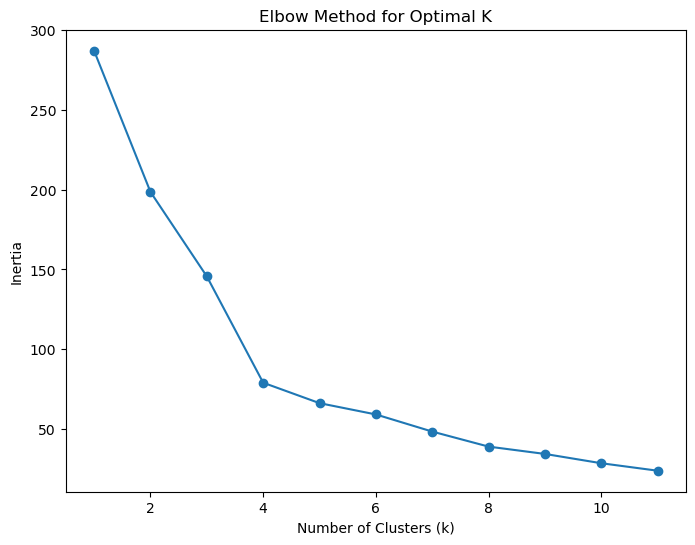

In [48]:
# DEFINE K RANGE
k_values = list(range(1,12))

# EMPTY LIST FOR INERTIA
inertia_values = []

# FOR LOOP - CALCULATE INERTIA FOR EACH K_VALUE
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0) # INITIALIZE MODEL WITH CURRENT K
    kmeans.fit(scaled_crypto_df) # FIT MODEL USING SCALED CRYPTO DATA
    inertia_values.append(kmeans.inertia_)

# DICTIONARY
elbow_data = {'k': k_values, 'inertia': inertia_values}

# PLOT LINE CHART
plt.figure(figsize=(8,6))
plt.plot(elbow_data['k'], elbow_data['inertia'], marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()
    

**Question:** What is the best value for `k`?

**Answer:** 4

---

# Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame
### Use the following steps to cluster the cryptocurrencies for the best value for k on the scaled DataFrame:
- Initialize the K-means model with the best value for k.
- Fit the K-means model using the scaled DataFrame.
- Predict the clusters to group the cryptocurrencies using the scaled DataFrame.
- Create a copy of the scaled DataFrame and add a new column with the predicted clusters.
- Create a scatter plot using hvPlot as follows:
    - Set the x-axis as "price_change_percentage_24h" and the y-axis as "price_change_percentage_7d".
    - Color the graph points with the labels found using K-means.
    - Add the "coin_id" column in the hover_cols parameter to identify the cryptocurrency respresented by each data point.

In [35]:
# INITIALIZE K-MEANS MODEL WITH BEST VALUE FOR K (4)
kmeans = KMeans(n_clusters=4, random_state=0)

# FIT K-MEANS MODEL USING SCALED DATAFRAME
kmeans.fit(scaled_crypto_df)

# PREDICT THE CLUSTERS TO GROUP
cluster_predictions = kmeans.predict(scaled_crypto_df)

# PRINT RESULTING ARRAY OF CLUSTER VALUES
print(cluster_predictions)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]


In [37]:
# COPY SCALED DATAFRAME
clustered_crypto_df = scaled_crypto_df.copy()

# ADD NEW COLUMN TO SCALED DATAFRAME WITH PREDICTED CLUSTERS
clustered_crypto_df['Cluster'] = cluster_predictions

# DISPLAY COPY
clustered_crypto_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,0.51,0.49,0.77,0.24,-0.07,-0.36,-0.25,2
ethereum,0.19,0.93,0.56,-0.05,-0.27,-0.12,-0.20,2
tether,0.02,-0.71,-0.02,-0.06,0.01,-0.55,-0.28,0
ripple,-0.04,-0.81,0.25,-0.05,-0.37,-0.46,-0.30,0
bitcoin-cash,1.19,2.00,1.76,0.55,-0.29,-0.50,-0.27,2


In [13]:
# CREATE SCATTER PLOT USING HVPLOT
plot = clustered_crypto_df.hvplot.scatter(
    x="price_change_percentage_24h", 
    y="price_change_percentage_7d",
    c="Cluster",
    colormap= "Category10",
    hover_cols = ["coin_id"],
    title="Cryptocurrency Clusters by 24h and 7d Price Change"
)

# DISPLAY PLOT
plot


:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,Cluster,coin_id)

---

# Optimize Clusters with Principal Component Analysis
- Use the original scaled DataFrame, perform a PCA and reduce the features to three principal components.
- Retrieve the explained variance to determine how much information can be attributed to each principal component and then answer the following question in your notebook:
    - What is the total explained variance of the three principal components?
- Create a new DataFrame with the scaled PCA data and set the "coin_id" index from the original DataFrame as the index for the new DataFrame.


In [55]:
# CREATE PCA MODEL N_COMPONENTS=3
pca = PCA(n_components=3)

# FIT_TRANSFORM TO REDUCE OG SCALED DATA TO THREE PRINCIPAL COMPONENTS
pca_data = pca.fit_transform(scaled_crypto_df)

# VIEW SCALED PCA DATA
print(f'Scaled PCA Data: {pca_data}')

Scaled PCA Data: [[-0.60066733  0.84276006  0.46159457]
 [-0.45826071  0.45846566  0.95287678]
 [-0.43306981 -0.16812638 -0.64175193]
 [-0.47183495 -0.22266008 -0.47905316]
 [-1.15779997  2.04120919  1.85971527]
 [-0.51653377  1.38837748  0.80407131]
 [-0.45071134  0.51769912  2.84614316]
 [-0.34559977  0.72943939  1.47801284]
 [-0.64946792  0.43216514  0.60030286]
 [-0.75901394 -0.20119979 -0.21765292]
 [-0.24819846 -1.37625159 -1.46202571]
 [-0.43840762 -0.17533654 -0.6633884 ]
 [-0.69342533 -0.47381462 -0.52759693]
 [ 0.06049915  2.90940385  1.49857131]
 [-0.39335243 -0.10819197 -0.01275608]
 [-0.79617564 -0.49440875  1.08281169]
 [ 0.06407452 -1.26982514 -1.09882928]
 [-0.48901506 -0.73271912 -0.06254323]
 [-0.3062723   0.70341515  1.71422359]
 [-0.51352775 -0.14280239 -0.65656583]
 [-0.36212044 -0.98691441 -0.72875232]
 [-0.60426463  0.82739764  0.43931594]
 [-0.4132956  -0.67411527 -1.07662834]
 [-0.40748304 -0.21250655 -0.35142563]
 [ 0.60897382  0.56353212 -1.14874159]
 [-0.450

In [40]:
# RETRIEVE EXPLAINED VARIANCE 
explained_variance = pca.explained_variance_ratio_

# SUM TOTAL EXPLAINED VARIANCE
total_explained_variance = explained_variance.sum()

# PRINT
print(f'Total Explained Variance: {total_explained_variance}')

Total Explained Variance: 0.8950316570309842


**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.895 

In [57]:
# CREATE NEW DATAFRAME WITH PCA DATA
pca_df = pd.DataFrame(pca_data, 
                      columns = ['PC1', 'PC2', 'PC3'], 
                      index = scaled_crypto_df.index)

# DISPLAY
print('PCA DataFrame:')
pca_df.head()


PCA DataFrame:


,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.60,0.84,0.46
ethereum,-0.46,0.46,0.95
tether,-0.43,-0.17,-0.64
ripple,-0.47,-0.22,-0.48
bitcoin-cash,-1.16,2.04,1.86


---

# Find the Best Value for k Using the Scaled PCA DataFrame
### Use the elbow method on the scaled PCA DataFrame to find the best value for k using the following steps:
- Create a list with the number of k-values from 1 to 11.
- Create an empty list to store the inertia values.
- Create a for loop to compute the inertia with each possible value of k.
- Create a dictionary with the data to plot the Elbow curve.
- Plot a line chart with all the inertia values computer with the different values of k to visually identify the optimal value for k.
- Answer the following question in your notebook:
    - What is the best value for k when using the scaled PCA DataFrame?
    - Does it differ from the best k value found using the original scaled DataFrame?

In [51]:
# K VALUES LIST 1-11
k_values_list = list(range(1,12))

# CREATE EMPTY LIST FOR INERTIA VALUES
inertia_values_list = []

# CREATE A FOR LOOP TO COMPUTE INERTIA WITH EACH POSSIBLE VALUE OF K
for k in k_values_list:
    model = KMeans(n_clusters=k, random_state=0)
    model.fit(pca_df)
    inertia_values_list.append(model.inertia_)

# CREATE A DICTIONARY TO PLOT THE ELBOW CURVE
elbow_dictionary = {'k': k_values_list, 'inertia': inertia_values_list}

# CREATE ELBOW DATA DATEFRAME
elbow_df = pd.DataFrame(elbow_dictionary)

# DISPLAY ELBOW DATAFRAME
print('Elbow Data:')
elbow_df

Elbow Data:


,k,inertia
0,1,256.87
1,2,168.81
2,3,115.92
3,4,49.67
4,5,41.36
5,6,30.80
6,7,25.92
7,8,21.89
8,9,17.72
9,10,13.84


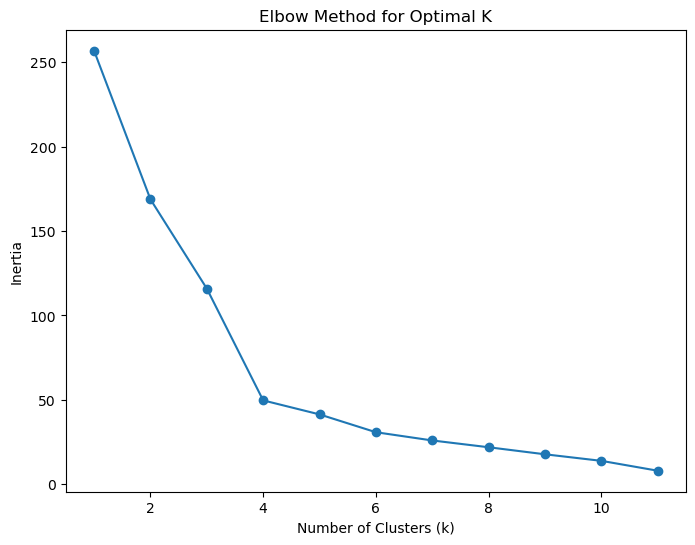

In [52]:
# PLOT

plt.figure(figsize=(8,6))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()


* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** NO

# Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame
### Use the following steps to cluster the cryptocurrencies for the best value for k on the PCA DataFrame:
- Initialize the K-means model with the best value for k.
- Fit the K-means model using the scaled PCA DataFrame.
- Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame.
- Create a copy of scaled PCA DataFrame and add a new column to store the predicted clusters.
- Create a scatter plot using hvPlot as follows:
    - Set the x-axis as "PC1" and the y-axis as "PC2".
    - Color the graph points with the labels found using K-means.
    - Add the "coin_id" column in the hover_cols parameter to identify the cryptocurrency represented by each data point.


In [54]:
# INITIALIZE K-MEANS MODEL WITH BEST VALUE FOR K (4)
kmeans_pca = KMeans(n_clusters=4, random_state=0)

# FIT K-MEANS MODEL USING PCA DATA
kmeans_pca.fit(pca_df)

# PREDICT THE CLUSTERS TO GROUP THE CRYPTOCURRENCIES USING SCALED PCA DATAFRAME
pca_clusters = kmeans_pca.predict(pca_df)

# PRINT ARRAY OF PCA CLUSTER VALUES
print(f'PCA Clusters: {pca_clusters}')

PCA Clusters: [2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]


In [58]:
# CREATE COPY OF PCA DATAFRAME
clustered_pca_df = pca_df.copy()

# ADD PREDICTIVE CLUSTERS COLUMN
clustered_pca_df['Clusters'] = pca_clusters

# DISPLAY SCALED PCA CLUSTER DATAFRAME
print('Clustered PCA DataFrame:')
clustered_pca_df

Clustered PCA DataFrame:


,PC1,PC2,PC3,Clusters
coin_id,,,,
bitcoin,-0.60,0.84,0.46,2
ethereum,-0.46,0.46,0.95,2
tether,-0.43,-0.17,-0.64,0
ripple,-0.47,-0.22,-0.48,0
bitcoin-cash,-1.16,2.04,1.86,2
binancecoin,-0.52,1.39,0.80,2
chainlink,-0.45,0.52,2.85,2
cardano,-0.35,0.73,1.48,2
litecoin,-0.65,0.43,0.60,2


In [60]:
# PCA Plot
plot_pca = clustered_pca_df.hvplot.scatter(
    x="PC1",
    y="PC2",
    c="Clusters",
    colormap="Category10",
    hover_cols=['coin_id'],
    title="Cryptocurrency Clusters (PCA-Transformed Data)"
)

# DISPLAY
plot_pca


:Scatter   [PC1]   (PC2,Clusters,coin_id)

Question: After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

Answer: 
  - Reduction in Dimensions 
    - simplifying the clustering process reduces computational complexity and increases speed.
  - Impact on Cluster Structure 
    - when focusing on only the most important features, PCA based clustering can capture dominant patterns, potentially leading to better-defined clusters.
  - Improved Visualization

